# 01 - Análisis Exploratorio de Datos (EDA)

**Objetivo:** En este notebook, se explora el dataset limpio para entender la distribución de las clases, analizar el poder predictivo de las características más importantes y descubrir relaciones de redundancia entre ellas. Los hallazgos de este análisis informarán las decisiones en la fase de preprocesamiento.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np

## 1. Carga de Datos y Vistazo Inicial

Primero, cargamos el dataset optimizado en formato Parquet y realizamos una inspección básica para confirmar que los datos están cargados correctamente y entender su estructura general.

In [14]:
# Configurar el estilo visual para todos los gráficos del notebook
sns.set_style('whitegrid')

# Cargar el dataset procesado desde el archivo Parquet
df = pd.read_parquet(r'../data/processed/cic_ids_2017_optimized.parquet')

# Mostrar las primeras 5 filas para verificar que la carga fue exitosa
df.head()

c:\Users\brand\anaconda3\envs\cyber-project-py311\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
c:\Users\brand\anaconda3\envs\cyber-project-py311\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [21]:
# Información básica del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2827876 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                       Dtype   
---  ------                       -----   
 0   Destination Port             int32   
 1   Flow Duration                int32   
 2   Total Fwd Packets            int32   
 3   Total Backward Packets       int32   
 4   Total Length of Fwd Packets  int32   
 5   Total Length of Bwd Packets  int32   
 6   Fwd Packet Length Max        int16   
 7   Fwd Packet Length Min        int16   
 8   Fwd Packet Length Mean       float16 
 9   Fwd Packet Length Std        float16 
 10  Bwd Packet Length Max        int16   
 11  Bwd Packet Length Min        int16   
 12  Bwd Packet Length Mean       float16 
 13  Bwd Packet Length Std        float16 
 14  Flow Bytes/s                 float32 
 15  Flow Packets/s               float32 
 16  Flow IAT Mean                float32 
 17  Flow IAT Std                 float32 
 18  Flow IAT Max               

In [4]:
# Estadísticas descriptivas
# Ignoramos temporalmente los RuntimeWarning solo para esta celda
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category = RuntimeWarning)
    display(df.describe())

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2827876.0,2.827876e+06,...,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2.827876e+06,2827876.0,2.827876e+06,2.827876e+06,2.827876e+06
mean,8.061534e+03,1.480065e+07,9.368972e+00,1.040396e+01,5.498522e+02,1.617903e+04,2.078044e+02,1.872929e+01,NaN,NaN,...,5.423519e+00,-2.744494e+03,8.163400e+04,4.117582e+04,1.533378e+05,5.835492e+04,8324468.0,5.043548e+05,8.704568e+06,7.928061e+06
std,1.827432e+04,3.366750e+07,7.500527e+02,9.978937e+02,9.998639e+03,2.264235e+06,7.175183e+02,6.035533e+01,0.0,0.000000e+00,...,6.367482e+02,1.085539e+06,6.489234e+05,3.935787e+05,1.026333e+06,5.773818e+05,23640570.0,4.605289e+06,2.437766e+07,2.337390e+07
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,...,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,1.550000e+02,2.000000e+00,1.000000e+00,1.200000e+01,2.000000e+00,6.000000e+00,0.000000e+00,6.0,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,3.133800e+04,2.000000e+00,2.000000e+00,6.200000e+01,1.230000e+02,3.700000e+01,2.000000e+00,34.0,0.000000e+00,...,1.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,3.239368e+06,5.000000e+00,4.000000e+00,1.880000e+02,4.840000e+02,8.100000e+01,3.600000e+01,50.0,2.615625e+01,...,2.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,5940.0,7.124000e+03,...,2.135570e+05,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,120000000.0,7.690000e+07,1.200000e+08,1.200000e+08


## 2. Análisis de la Variable Objetivo (Label)

El paso más importante es analizar la distribución de la variable que queremos predecir.

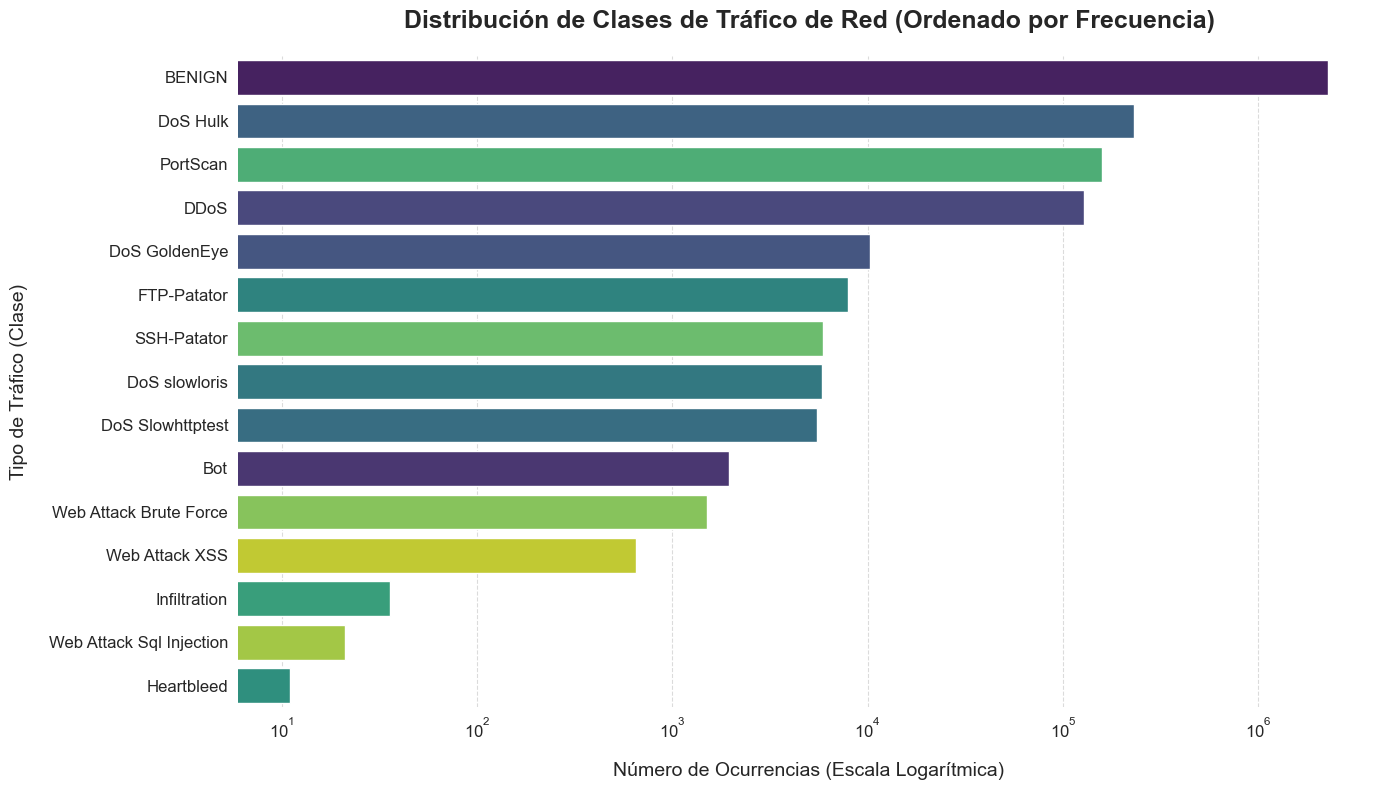

In [8]:
# GRÁFICO ESTILIZADO: Distribución de Clases

# Preparación de los datos para el orden correcto (ya lo tenías, pero lo mantenemos explícito)
label_counts = df['Label'].value_counts()
orden_barras = label_counts.index

# Configuración general de la figura
plt.figure(figsize = (14, 8)) # Aumentamos ligeramente el tamaño para mejor legibilidad

# Creación del countplot con mejoras
sns.countplot(
    y = 'Label',
    data = df,
    order = orden_barras,
    palette = 'viridis', # Una paleta de colores vibrante
    hue = 'Label',       # Esto ayuda a que cada barra tenga su propio color
    legend = False       # No necesitamos una leyenda si cada barra tiene el nombre en el eje Y
)

# Estilizado de títulos y etiquetas
plt.title(
    'Distribución de Clases de Tráfico de Red (Ordenado por Frecuencia)',
    fontsize = 18,       # Tamaño de fuente más grande para el título
    fontweight = 'bold', # Negrita para el título
    pad = 20             # Espacio entre el título y el gráfico
)
plt.xlabel(
    'Número de Ocurrencias (Escala Logarítmica)',
    fontsize = 14,
    labelpad = 15        # Espacio entre el label y el eje
)
plt.ylabel(
    'Tipo de Tráfico (Clase)',
    fontsize = 14,
    labelpad = 15
)

# Configuración de los ejes
plt.xscale('log') # Mantenemos la escala logarítmica, es crucial aquí
plt.xticks(fontsize = 12) # Tamaño de fuente para los números del eje X
plt.yticks(fontsize = 12) # Tamaño de fuente para los nombres de las clases del eje Y

# Mejoras visuales adicionales
sns.despine(left = True, bottom = True) # Elimina los bordes superior y derecho para un aspecto más limpio
plt.grid(axis = 'x', linestyle = '--', alpha = 0.7) # Añade líneas de cuadrícula horizontales sutiles para facilitar la lectura

# Ajustar el layout y mostrar el gráfico
plt.tight_layout() # Ajusta automáticamente los parámetros para que no se superpongan los elementos
plt.show()

### Conclusiones sobre la Distribución de Clases

El gráfico de barras muestra un **severo desbalance de clases**. La clase `BENIGN` es abrumadoramente mayoritaria en comparación con todas las clases de ataques.

**Implicación Clave:** Este desbalance significa que la métrica de **exactitud (accuracy)** no será confiable para evaluar nuestro modelo. Deberemos centrarnos en métricas como **Precision, Recall y F1-Score**.

## 3. Análisis de Características Numéricas

Ahora exploramos algunas características individuales para evaluar su poder predictivo, es decir, su capacidad para ayudar a diferenciar entre las distintas clases.

### 3.1. Característica: **Flow Duration**

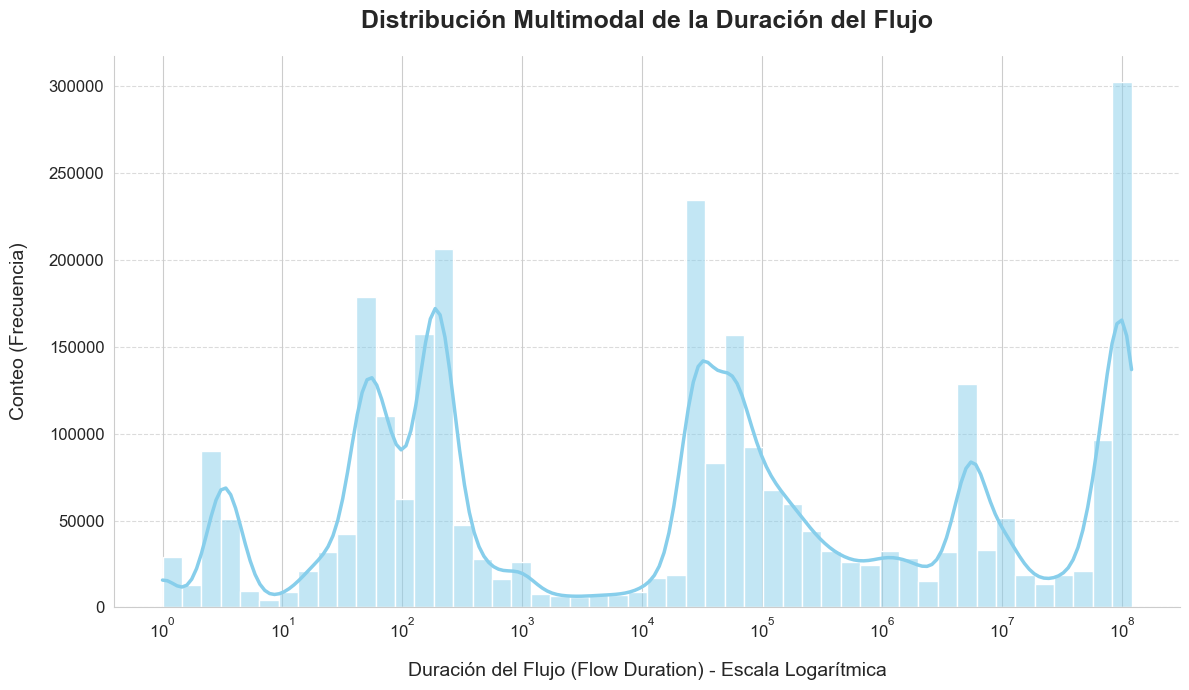

In [6]:
# GRÁFICO ESTILIZADO: Histograma de Flow Duration

# Configuración de la figura
plt.figure(figsize = (12, 7))

# Creación del histograma con mejoras estéticas
sns.histplot(
    df['Flow Duration'],
    bins = 50,
    kde = True,
    log_scale = True,
    color = 'skyblue',                                  # Color base para las barras
    line_kws = {'color': 'darkblue', 'linewidth': 2.5}  # Estilo para la línea KDE: más gruesa y de otro color
)

# Estilizado de títulos y etiquetas (haciéndolos más descriptivos)
plt.title(
    'Distribución Multimodal de la Duración del Flujo',
    fontsize = 18,
    fontweight = 'bold',
    pad = 20
)
plt.xlabel(
    'Duración del Flujo (Flow Duration) - Escala Logarítmica',
    fontsize = 14,
    labelpad = 15
)
plt.ylabel(
    'Conteo (Frecuencia)',
    fontsize = 14,
    labelpad = 15
)

# Mejoras visuales adicionales
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
sns.despine() # Elimina el borde superior y derecho
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7) # Rejilla solo en el eje Y

# Ajustar y mostrar
plt.tight_layout()
plt.show()

#### Distribución de `Flow Duration`

El histograma muestra que `Flow Duration` tiene una **distribución multimodal** (con múltiples picos) a lo largo de la escala logarítmica.

**Observación Clave:** La existencia de varios picos distintos sugiere que hay diferentes tipos de comportamiento de red agrupados en el dataset. Por ejemplo, los picos en la parte baja (**10^1**-**10^2**) podrían corresponder a conexiones muy cortas y rápidas (como los `PortScan`), mientras que los picos en la parte alta (**10^7**-**10^8**) representan sesiones muy largas (como `DDoS` o descargas grandes). Esto refuerza la idea de que esta característica es muy útil para separar las clases.

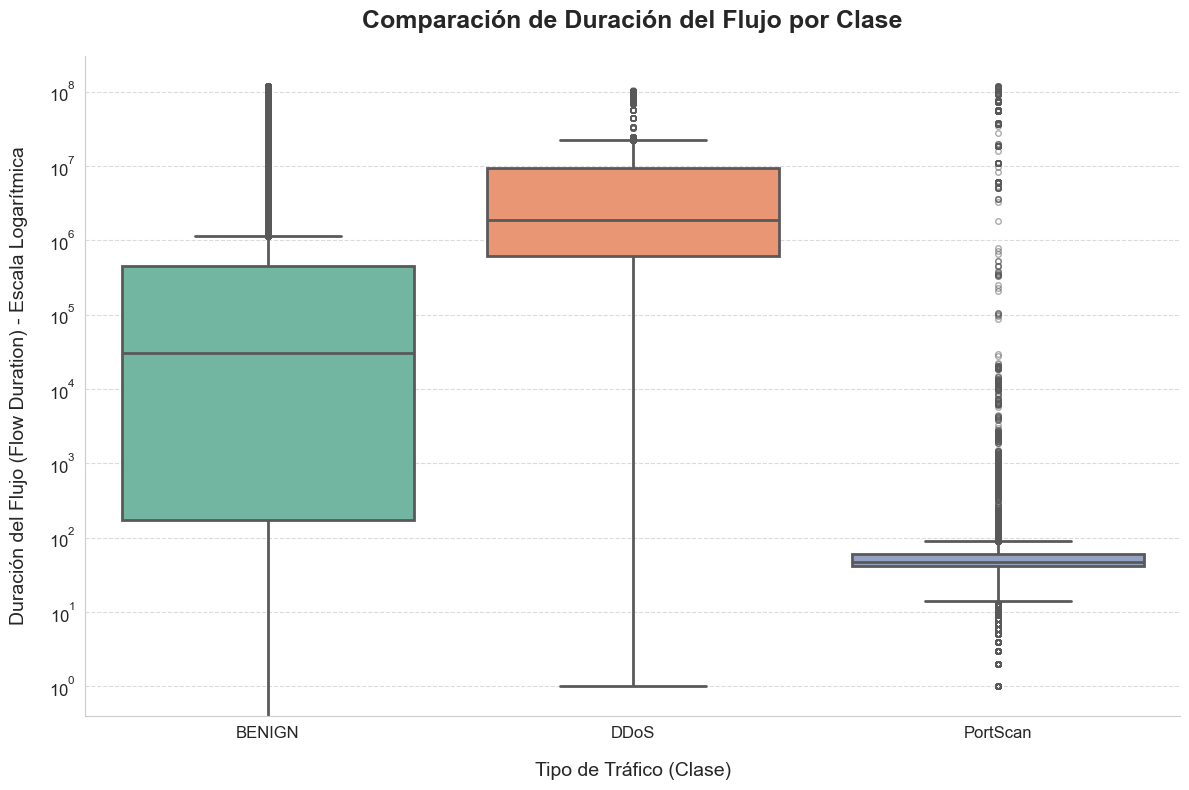

In [9]:
# GRÁFICO ESTILIZADO: Box Plot de Flow Duration

# Preparación de datos (sin cambios)
clases_a_comparar = ['BENIGN', 'DDoS', 'PortScan']
df_sample = df[df['Label'].isin(clases_a_comparar)].copy()
df_sample['Label'] = df_sample['Label'].cat.remove_unused_categories()

# Configuración de la figura
plt.figure(figsize = (12, 8))

# Creación del box plot con mejoras estéticas
sns.boxplot(
    data = df_sample,
    x = 'Label',
    y = 'Flow Duration',
    palette = 'Set2',     # Una paleta de colores agradable para categorías
    linewidth = 2,        # Grosor de las líneas de las cajas y bigotes
    flierprops = dict(marker = 'o', markersize = 4, alpha = 0.5), # Estilo para los outliers
    hue = 'Label', # Colorea cada caja según la clase
    legend = False # No necesitamos una leyenda si cada caja tiene el nombre en el eje X
)

# Estilizado de títulos y etiquetas
plt.title(
    'Comparación de Duración del Flujo por Clase',
    fontsize = 18,
    fontweight = 'bold',
    pad = 20
)
plt.xlabel(
    'Tipo de Tráfico (Clase)',
    fontsize = 14,
    labelpad = 15
)
plt.ylabel(
    'Duración del Flujo (Flow Duration) - Escala Logarítmica',
    fontsize = 14,
    labelpad = 15
)

# Configuración de los ejes
plt.yscale('log') # Mantenemos la escala logarítmica
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

# Mejoras visuales adicionales
sns.despine()
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

# Ajustar y mostrar
plt.tight_layout()
plt.show()

### Análisis de la Característica Flow Duration
**Este gráfico es clave. Demuestra que la Flow Duration es una característica muy predictiva para diferenciar las clases.**

- `DDoS:` Los ataques de este tipo muestran una duración consistentemente alta, con su mediana (la línea central de la caja) ubicada mucho más arriba que las demás clases.

- `PortScan:` Por el contrario, estos ataques son en su mayoría extremadamente cortos. Su caja es muy chata y se encuentra en la parte más baja del gráfico.

- `BENIGN:` El tráfico normal presenta una gran variabilidad en su duración, lo que es esperable, ya que abarca desde conexiones muy cortas hasta algunas muy largas.

**Conclusión: Un modelo de Machine Learning podrá utilizar fácilmente estas claras diferencias para distinguir los tipos de tráfico.**

### 3.2. Característica: **Total Fwd Packets**

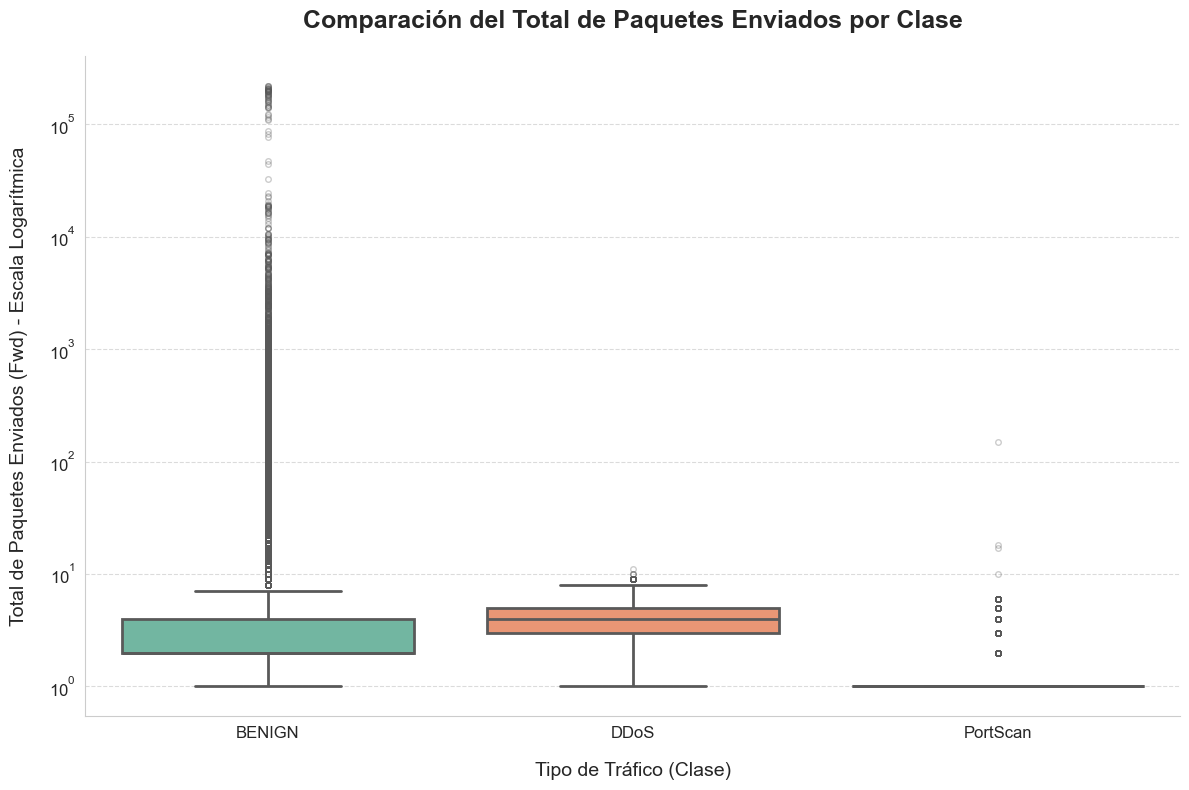

In [11]:
# GRÁFICO ESTILIZADO: Box Plot de Total Fwd Packets

# Preparación de datos (sin cambios)
clases_a_comparar = ['BENIGN', 'DDoS', 'PortScan']
df_sample = df[df['Label'].isin(clases_a_comparar)].copy()
df_sample['Label'] = df_sample['Label'].cat.remove_unused_categories()

# Configuración de la figura
plt.figure(figsize = (12, 8))

# Creación del box plot con el mismo estilo que el anterior
sns.boxplot(
    data = df_sample,
    x = 'Label',
    y = 'Total Fwd Packets',
    palette = 'Set2',
    linewidth = 2,
    flierprops = dict(marker = 'o', markersize = 4, alpha = 0.3), # Hacemos los outliers un poco más transparentes
    hue = 'Label',
    legend = False
)

# Estilizado de títulos y etiquetas
plt.title(
    'Comparación del Total de Paquetes Enviados por Clase',
    fontsize = 18,
    fontweight = 'bold',
    pad = 20
)
plt.xlabel(
    'Tipo de Tráfico (Clase)',
    fontsize = 14,
    labelpad = 15
)
plt.ylabel(
    'Total de Paquetes Enviados (Fwd) - Escala Logarítmica',
    fontsize = 14,
    labelpad = 15
)

# Configuración de los ejes
plt.yscale('log')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

# Mejoras visuales adicionales
sns.despine()
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

# Ajustar y mostrar
plt.tight_layout()
plt.show()

### Análisis de la Característica Total Fwd Packets
**A diferencia de Flow Duration, esta característica no parece ser un buen predictor para diferenciar entre el tráfico `BENIGN` y los ataques `DDoS`.**

- `BENIGN` y `DDoS:` Sus distribuciones son casi idénticas. La mayoría de los flujos en ambas categorías consisten en un número muy bajo de paquetes (la mediana está por debajo de 10), lo que dificulta su separación basándose únicamente en esta métrica.

- `PortScan:` Se distingue claramente del resto, con un número de paquetes consistentemente mínimo, como era de esperar.

**Nota sobre Outliers:** La clase `BENIGN` muestra una gran cantidad de valores atípicos (outliers) con un alto número de paquetes, lo cual probablemente representa actividades legítimas como la descarga de archivos grandes.

**Conclusión: Aunque esta característica ayuda a identificar `PortScan`, su escaso poder para separar `BENIGN` de `DDoS` sugiere que el modelo probablemente le dará una importancia menor en comparación con `Flow Duration`.**

## 4. Análisis de Correlación

Finalmente, buscamos redundancia entre las características más prometedoras.

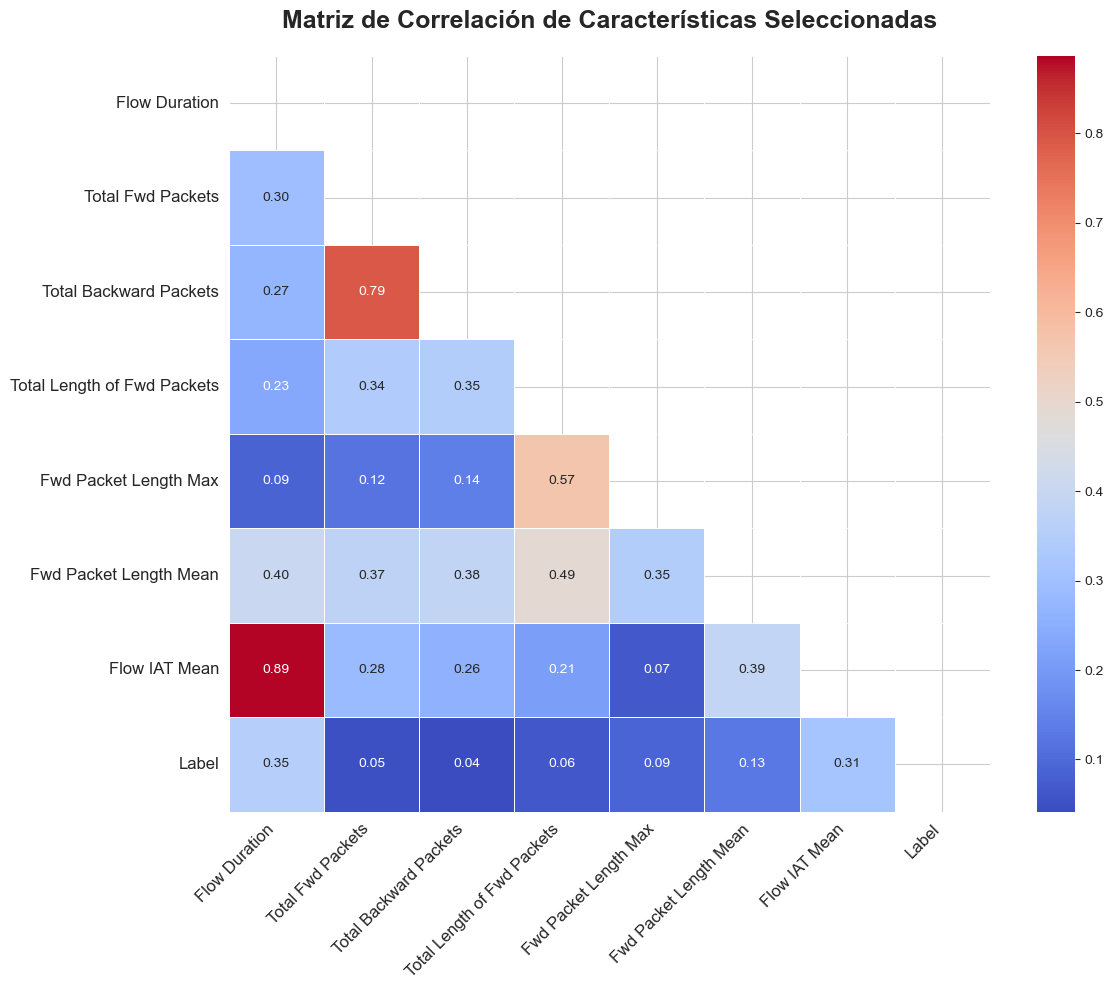

In [13]:
# GRÁFICO ESTILIZADO: Matriz de Correlación

# Preparación de datos (sin cambios)
features_interesantes = [
    'Flow Duration',
    'Total Fwd Packets',
    'Total Backward Packets',
    'Total Length of Fwd Packets',
    'Fwd Packet Length Max',
    'Fwd Packet Length Mean',
    'Flow IAT Mean',
    'Label'
]
correlation_matrix = df[features_interesantes].apply(lambda x: x.factorize()[0]).corr()

# Creación de una máscara para ocultar el triángulo superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Configuración de la figura
plt.figure(figsize=(12, 10))

# Creación del heatmap con la máscara y otros ajustes
sns.heatmap(
    correlation_matrix,
    mask=mask,                # Aplicamos la máscara para ocultar la mitad superior
    annot=True,               # Mantenemos los números
    cmap='coolwarm',          # Un buen mapa de colores divergente
    fmt='.2f',
    linewidths=.5,
    annot_kws={"size": 10}    # Ajustamos el tamaño de la fuente de los números
)

# Estilizado de títulos y etiquetas
plt.title(
    'Matriz de Correlación de Características Seleccionadas',
    fontsize=18,
    fontweight='bold',
    pad=20
)
# Rotamos las etiquetas del eje X para que se lean mejor
plt.xticks(fontsize=12, rotation=45, ha="right")
plt.yticks(fontsize=12)

# Ajustar y mostrar
plt.tight_layout()
plt.show()

### Análisis de Correlación

La matriz de correlación revela varias relaciones importantes entre las características seleccionadas:

- **Correlación Muy Fuerte (Redundancia):** Se observa una correlación positiva muy alta de **0.89** entre `Flow Duration` y `Flow IAT Mean`. Esto indica que ambas características miden conceptos muy similares y son parcialmente redundantes.

- **Correlación Fuerte:** Existe también una correlación notable de **0.79** entre `Total Fwd Packets` y `Total Backward Packets`.

**Conclusión: Las características con alta correlación, especialmente `Flow Duration` y `Flow IAT Mean`, serán candidatas a ser evaluadas en la fase de preprocesamiento. Es posible que se elimine una de ellas para simplificar el modelo y evitar la multicolinealidad.**

## Conclusiones del EDA

Este análisis exploratorio nos ha proporcionado tres hallazgos fundamentales para la siguiente fase:
1.  **Desbalance Crítico:** El dataset está extremadamente desbalanceado.
2.  **Features Clave:** Características como `Flow Duration` son altamente predictivas.
3.  **Redundancia:** Existen características redundantes (`Flow Duration` y `Flow IAT Mean`) que pueden ser simplificadas.